In [47]:
import csv, psycopg2, time, datetime
import matplotlib.pyplot as plt

In [14]:
conn = psycopg2.connect("host=127.0.0.1 dbname=nebula_ipfs_2022_05_03 user=postgres")
cur = conn.cursor()

In [16]:
cur.execute("select * from sessions where finished limit 10;")
cur.fetchall()

[(166184910,
  16002,
  datetime.datetime(2022, 5, 3, 11, 1, 50, 496553, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  datetime.datetime(2022, 5, 3, 12, 1, 28, 945117, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  None,
  datetime.datetime(2022, 5, 3, 10, 59, 28, 458515, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  datetime.timedelta(seconds=3578, microseconds=448564),
  datetime.timedelta(days=-1, seconds=86257, microseconds=961962),
  2,
  'io_timeout',
  datetime.datetime(2022, 5, 3, 13, 7, 53, 419815, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  datetime.datetime(2022, 5, 3, 11, 33, 18, 531295, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  True),
 (166176662,
  68003,
  datetime.datetime(2022, 5, 3, 7, 59, 33, 999395, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  datetime.datetime(2022, 5, 3, 7, 59, 33, 999395, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
  None,


In [43]:
cur.execute("select max_duration from sessions where finished;")
session_durations = [s[0] for s in cur.fetchall() if s[0]>datetime.timedelta(seconds=0)]

In [44]:
d = datetime.timedelta(days=10)

h24 = datetime.timedelta(days=1)

In [45]:
timerange = [s//datetime.timedelta(minutes=30) for s in session_durations]    

In [153]:
sorted(session_durations)

[datetime.timedelta(microseconds=324026),
 datetime.timedelta(microseconds=343894),
 datetime.timedelta(microseconds=615775),
 datetime.timedelta(microseconds=799884),
 datetime.timedelta(microseconds=844879),
 datetime.timedelta(microseconds=896947),
 datetime.timedelta(microseconds=984099),
 datetime.timedelta(seconds=1, microseconds=271272),
 datetime.timedelta(seconds=1, microseconds=273797),
 datetime.timedelta(seconds=1, microseconds=336272),
 datetime.timedelta(seconds=1, microseconds=435310),
 datetime.timedelta(seconds=1, microseconds=577225),
 datetime.timedelta(seconds=1, microseconds=578243),
 datetime.timedelta(seconds=1, microseconds=846788),
 datetime.timedelta(seconds=1, microseconds=987238),
 datetime.timedelta(seconds=1, microseconds=994206),
 datetime.timedelta(seconds=2, microseconds=112705),
 datetime.timedelta(seconds=2, microseconds=194277),
 datetime.timedelta(seconds=2, microseconds=233285),
 datetime.timedelta(seconds=2, microseconds=351393),
 datetime.timedel

(array([0.08538488, 0.02410195, 0.00458795, 0.00122717]),
 array([  6,  12,  24,  48, 120]),
 <BarContainer object of 4 artists>)

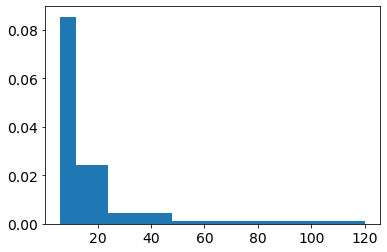

In [160]:
plt.hist([d/datetime.timedelta(hours=1) for d in session_durations], bins=[6, 12, 24, 2*24, 5*24], density=True)

In [161]:
hours = [d/datetime.timedelta(hours=1) for d in session_durations]

In [180]:
limits = [0, 1, 2, 3, 6, 8, 12, 24, 2*24, 7*24]

In [181]:
cum = [0]*len(limits)

In [182]:
for h in hours:
    for i in range(len(limits)):
        if h>limits[i]:
            cum[i]+=1 

In [183]:
cum = [c/len(session_durations) for c in cum]

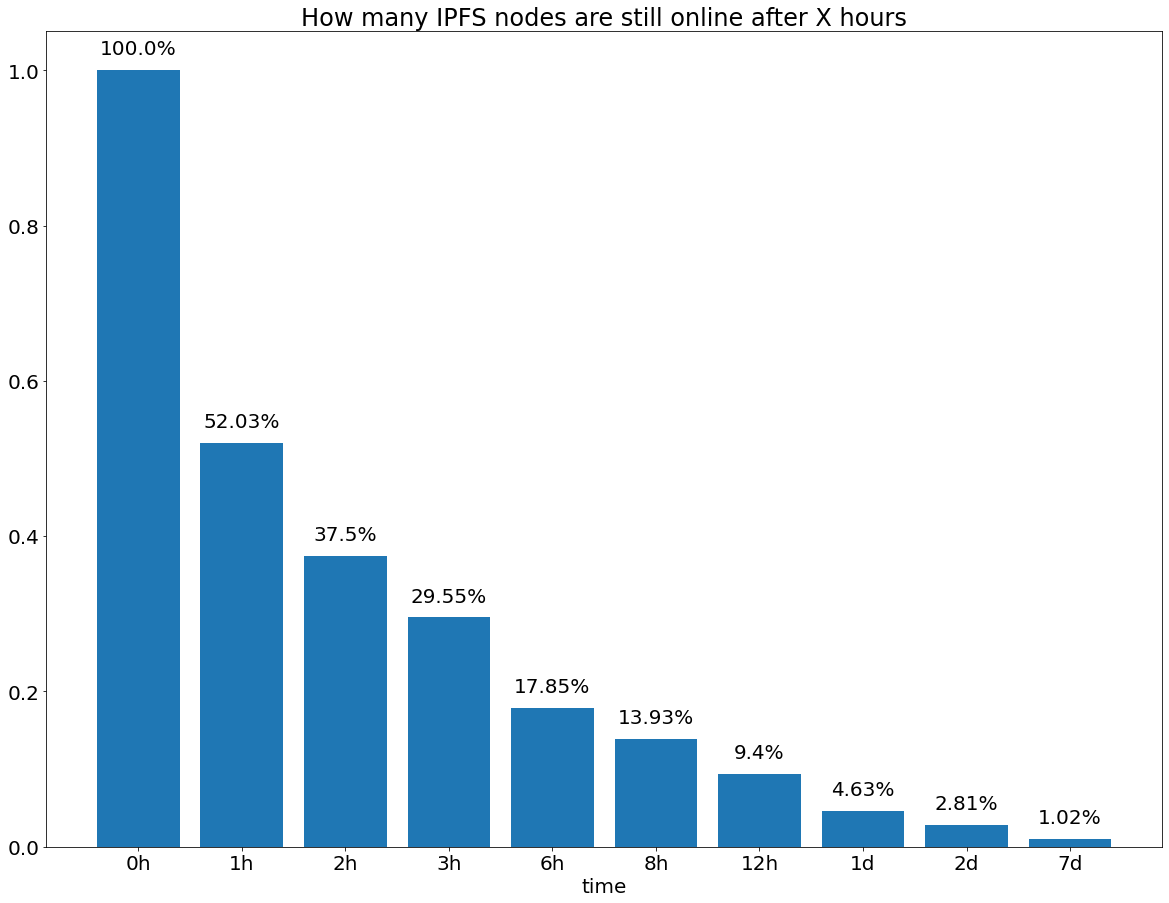

In [200]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.bar(range(0,len(limits)), cum)
ax.set_xticks(range(0,len(limits)))
ax.set_xticklabels(['0h', '1h', '2h', '3h', '6h', '8h', '12h', '1d', '2d', '7d'])

for i in range(len(limits)):
    plt.text(i, cum[i]+0.02, str(round(100*cum[i],2))+'%', ha='center')
    
plt.title('How many IPFS nodes are still online after X hours')
plt.xlabel('time')

plt.show()

## Expected ratio of stale entry over session duration

In [270]:
stale_ratios = [[] for _ in limits]
for h in hours:
    for i in range(len(limits)):
        if i==len(limits)-1:
            if h>limits[i]:
                stale_ratios[i].append(1/(12*(1/12+h)))
        elif h>limits[i] and h<limits[i+1]:
            if i==1:
                print(h)
            stale_ratios[i].append(1/(12*(1/12+h)))

1.9062117697222223
1.9509571544444444
1.793191905
1.8265403519444445
1.9426174080555556
1.7999763394444444
1.7061044230555555
1.5900617125
1.765430695
1.74614048
1.688545635
1.6354301655555556
1.6354541297222223
1.6544146075
1.6544513902777778
1.673127765
1.6355533172222223
1.6355424855555556
1.5849178419444445
1.5407454355555557
1.6355588277777777
1.6544931705555554
1.514729153888889
1.3331567083333333
1.3331614
1.2973546638888889
1.6251546083333333
1.2820523633333334
1.2903864094444444
1.6877832783333333
1.8265448455555555
1.547034345
1.5388030686111112
1.7656728327777778
1.7463262897222223
1.765681785
1.634228058888889
1.6343781411111111
1.6168728916666666
1.4457447555555556
1.4808991580555555
1.4051603963888888
1.297426331388889
1.2552276519444445
1.2579095783333334
1.2334250377777778
1.2372789058333333
1.7627374425
1.2309040475
1.2272080427777778
1.2309067627777779
1.7794050283333334
1.5356594619444444
1.5338007625
1.5284275808333334
1.536239485
1.23511531
1.4160755830555556
1.539

1.0022624994444445
1.470495353888889
1.259389626111111
1.0290177486111112
1.287366885
1.2689284944444446
1.5710544319444444
1.4844417227777778
1.2612874586111111
1.5026902252777778
1.528051758888889
1.0209421961111111
1.227139746111111
1.2249677130555556
1.0134776080555556
1.2811427891666667
1.0241827788888889
1.9795505333333334
1.0192437427777779
1.2810044597222223
1.5147214672222222
1.48551592
1.4989709025
1.7556374377777777
1.786140611111111
1.004211416111111
1.2716031827777778
1.4930501647222223
1.4920812372222223
1.5407334736111111
1.0139922477777779
1.0141597316666666
1.0393567213888888
1.2379056077777777
1.5152253430555556
1.0148436427777778
1.7810945127777777
1.9839161380555554
1.502863941111111
1.5196878444444444
1.2658451916666666
1.0142318030555555
1.0117736708333334
1.0021076016666666
1.4821460069444445
1.4885746736111112
1.0197693083333332
1.9987739308333334
1.0026598080555555
1.0553363433333334
1.5129867283333334
1.7533336355555555
1.0190211511111111
1.9960079025
1.529360

1.5131879933333334
1.2446892916666668
1.4967006061111112
1.7898322844444445
1.9968285691666667
1.2375088705555555
1.5304968675
1.5099055694444445
1.5392223658333333
1.2665689436111112
1.5412480827777777
1.7686243005555555
1.7705356719444445
1.5039066127777778
1.026626503611111
1.2745062630555555
1.4921357069444445
1.317802488611111
1.0409849455555555
1.9841239661111112
1.2843579358333332
1.0438631102777778
1.771744538611111
1.008211631388889
1.7810030030555555
1.490097775
1.5133467819444444
1.4843142408333334
1.0110049416666667
1.5049466355555556
1.2534150133333333
1.2401668580555556
1.4999982161111112
1.0200322405555555
1.767154221388889
1.269922231388889
1.021480035
1.0003155675
1.2952031875
1.299856543888889
1.2654919213888889
1.0136445672222223
1.2634126191666666
1.0081558008333333
1.5073753455555556
1.2655879413888889
1.023749895
1.9785474525
1.9990963411111111
1.9978843927777779
1.5204393875
1.2774422697222223
1.00420403
1.0139818291666667
1.5217438952777778
1.5160255872222221
1.

1.2560997977777777
1.0166064591666666
1.2638667044444445
1.0146228005555555
1.0100807127777778
1.5306856508333333
1.2468088736111111
1.5270249975
1.0092740638888889
1.5386445938888889
1.0193864222222222
1.0058306297222221
1.5185233077777778
1.4873971194444444
1.2680887511111112
1.7816464347222223
1.5219667494444444
1.0209881861111112
1.4962496083333334
1.2640689847222222
1.502503943888889
1.028866621111111
1.0099958427777778
1.2777625125
1.5277860441666666
1.508525995
1.029654713888889
1.5037205277777779
1.7655934294444444
1.4792008277777777
1.0067484766666666
1.5137897172222223
1.0149269569444443
1.5047089713888888
1.2602424152777778
1.7594726519444444
1.0085940947222223
1.0249361980555556
1.529750235
1.4834450572222222
1.9926808055555556
1.970666075
1.0098327263888889
1.2708065163888889
1.5137204380555556
1.2735195372222223
1.2558963741666667
1.2147478672222223
1.2529191680555556
1.7778105616666666
1.2632784333333333
1.9770247672222223
1.0398803138888888
1.5169625366666666
1.50089339

1.5375979277777778
1.0173647636111112
1.0083979527777778
1.0176526888888888
1.766233103888889
1.0434269652777777
1.0379408569444444
1.981518945
1.760124703888889
1.5287763105555556
1.7668203777777778
1.766405643611111
1.0307695827777779
1.0195852136111112
1.7631676416666666
1.495207848888889
1.018181303888889
1.9896962458333334
1.5079859347222222
1.5177538261111112
1.5026618497222222
1.0204507825
1.5184842241666667
1.5290015247222222
1.2268374233333332
1.0243311144444445
1.4948139519444446
1.048928285
1.2779063697222222
1.2434477591666666
1.7743116147222222
1.5084874302777778
1.0150089080555555
1.2643730722222222
1.4976879647222223
1.5000882783333334
1.76844314
1.766836273888889
1.2578916447222221
1.4945393313888888
1.4983845441666668
1.7490954577777778
1.2821510844444444
1.2886903725
1.5074999130555555
1.9981628319444444
1.27892689
1.7934223583333333
1.0050193875
1.0253189875
1.5232290222222222
1.542215026388889
1.0160523019444445
1.008399088888889
1.7499048272222222
1.762536335
1.010

1.7753113544444445
1.9999224713888888
1.7629842522222223
1.0005848202777778
1.7731991830555556
1.3191203958333333
1.7610209291666667
1.019978208611111
1.0154576105555555
1.0030936944444444
1.2605638183333334
1.7777616447222222
1.5055758397222223
1.0381130908333334
1.0040603158333334
1.514004605
1.5166056625
1.0019718780555555
1.5071326511111112
1.2623526313888889
1.0005857708333334
1.011815221111111
1.759454973888889
1.2663055569444444
1.2563404363888888
1.0110000325
1.5299693505555556
1.0128963330555556
1.2618782116666667
1.2470760716666667
1.99038943
1.2569312458333333
1.0107669166666666
1.503644311111111
1.2563480844444443
1.0247710216666666
1.5031328094444445
1.98836445
1.5014242077777777
1.4912505444444444
1.7366162241666667
1.0002604366666668
1.0022722880555555
1.0096842844444445
1.5179137105555556
1.03079806
1.7786759172222222
1.0062457152777777
1.5061632233333333
1.0176149319444445
1.5167840141666666
1.0187209344444443
1.5321070377777777
1.2896419252777778
1.23070973
1.51024239

1.0055679005555556
1.2378674741666666
1.7506455744444445
1.5000798875
1.96634616
1.7464949719444445
1.0403932608333333
1.5190249852777777
1.5191060855555556
1.5156501086111112
1.9687354894444444
1.9827208633333333
1.5007307433333332
1.0273831577777777
1.4981069575
1.5007932555555556
1.5007213766666667
1.4985522755555556
1.5008099258333334
1.4972877175
1.500216241111111
1.0276855147222221
1.768010763888889
1.5100921305555555
1.0124686738888888
1.966204348888889
1.4994346966666667
1.4989409722222222
1.5007286194444445
1.0137662838888888
1.2580424491666666
1.2619627380555556
1.4968816652777779
1.276842618611111
1.533225065
1.997190641111111
1.4784545527777777
1.4873821125
1.0034396763888889
1.5304174833333333
1.0145448855555557
1.0083361238888888
1.2397835891666666
1.7554850327777778
1.5004213127777777
1.4967931922222222
1.49547932
1.2715747661111112
1.0298581344444444
1.7914676441666666
1.9922952808333334
1.9875773925
1.0576431902777779
1.3137718983333333
1.5068858869444444
1.76842181055

1.9879487558333333
1.7738779511111111
1.5283510497222221
1.9900043697222223
1.5375785213888888
1.5230514138888889
1.0140051802777779
1.767291411388889
1.024877501388889
1.7685953783333332
1.0242493163888888
1.012402218611111
1.7687652558333333
1.776084708888889
1.5190953669444445
1.256598888611111
1.9645638875
1.5020749572222223
1.0010401861111111
1.9843029513888888
1.9818757625
1.7735883052777779
1.735212878888889
1.266143318611111
1.0554941583333333
1.0248664438888888
1.0317132466666668
1.4819104872222222
1.252410455
1.252384271111111
1.2599565813888889
1.240535873888889
1.2362289544444445
1.26620416
1.290437721111111
1.4913885622222223
1.0017934005555555
1.2687660505555556
1.2690359386111112
1.9971289891666666
1.5224559311111112
1.4757251502777777
1.973106185
1.2499444241666666
1.9940782144444444
1.2642477180555556
1.0052166575
1.037946508611111
1.2453886719444445
1.4995742647222223
1.5182718897222223
1.7771153913888889
1.4880410197222222
1.492468681388889
1.0347538333333333
1.02964

1.9826566630555555
1.0113767822222222
1.003987733888889
1.2714892358333334
1.7449153647222222
1.7676454397222223
1.511876368888889
1.2769314025
1.0038453452777778
1.499168383888889
1.0143201
1.0067979622222223
1.493697856388889
1.5013029716666666
1.010047823611111
1.7445626858333334
1.0203075172222222
1.0170341430555556
1.5348917122222223
1.0116814625
1.2625383008333333
1.0015026486111112
1.0072472636111112
1.7463914941666667
1.7608337775
1.5011955838888889
1.7658930122222223
1.2739190330555556
1.4974405258333334
1.4754459705555556
1.016384625
1.496921715
1.5096831233333334
1.4936263716666667
1.5118021747222221
1.5188036433333334
1.4989075377777779
1.7600832272222222
1.2769363911111111
1.2517227633333334
1.012944811111111
1.2636433730555556
1.2575099541666668
1.488180718888889
1.771628583888889
1.9847149205555557
1.0107784255555556
1.0267725516666666
1.5018391402777778
1.0184075722222221
1.7625930488888888
1.0012879969444444
1.4792588241666667
1.0179501241666666
1.792651155
1.015616958

1.7643097027777779
1.020149088611111
1.9659748891666666
1.7980828361111112
1.0053997802777779
1.0042701388888888
1.0000504894444444
1.2597866605555557
1.507916968888889
1.01603937
1.2668789013888888
1.005865933611111
1.002584415
1.0052119108333333
1.0064178866666667
1.9967070130555555
1.7539601272222223
1.9901182102777777
1.5021132286111112
1.9970574166666666
1.2584693505555555
1.7556322036111112
1.0082897580555557
1.2664699236111112
1.2746948388888888
1.9882302111111112
1.009891913611111
1.244394515
1.2522241641666667
1.2602540133333333
1.496319498611111
1.4919323663888888
1.018580955
1.2671162102777778
1.5323729122222223
1.4845737344444445
1.7768049463888889
1.51528705
1.5390967233333332
1.0128366547222223
1.0087554116666666
1.515980015
1.78339563
1.7862339811111112
1.0054682852777779
1.503765065
1.4966898711111112
1.7741297833333334
1.0190413725
1.0090830775
1.7795575483333332
1.774383973611111
1.497191603611111
1.5051853608333334
1.0332089486111111
1.7714777580555556
1.502618310833

1.0072200225
1.252285545
1.046806665
1.0123274747222222
1.037837628611111
1.2760668772222221
1.005365845
1.5030123172222223
1.4938069663888889
1.495277378888889
1.5223332577777777
1.7659480755555557
1.7645831772222222
1.5021055069444444
1.5063763341666667
1.0129821172222222
1.9988749891666666
1.5043059530555556
1.7647395283333334
1.0396518241666666
1.5004337152777778
1.0030814316666667
1.002301105
1.5307923661111111
1.5289662755555555
1.8299350677777777
1.518058376111111
1.033269625
1.0475433536111112
1.288373625
1.2602922922222222
1.2916417369444444
1.2713060211111111
1.0035996958333333
1.5035783475
1.5242981422222222
1.5250344322222222
1.2810438283333334
1.5097931825
1.0303344644444445
1.2727902411111112
1.5200155183333333
1.4876554227777778
1.7974809083333334
1.0203346130555555
1.02153244
1.2860595261111112
1.5285242725
1.0120700930555555
1.5361049455555555
1.255994075
1.0107165727777778
1.0101200880555556
1.4576808605555556
1.9839305430555556
1.2589894322222221
1.9897306913888888
1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1.0118241216666666
1.0255295425
1.5117737152777777
1.4921547019444446
1.2743814519444445
1.5183289791666668
1.2774214430555555
1.0063580388888889
1.0122821583333332
1.0134440280555554
1.0270806116666666
1.0063564472222222
1.501386023888889
1.012723406111111
1.0005543980555556
1.502096388888889
1.7722955719444444
1.2872146391666666
1.2804192091666666
1.9807253047222222
1.7695177075
1.5100519994444443
1.0019675961111112
1.9739687183333334
1.5333442427777777
1.4898186044444444
1.5130220611111111
1.5076804291666666
1.0146243552777778
1.0003526047222222
1.0079858127777779
1.294762495
1.796654163611111
1.7902477602777778
1.7739735033333333
1.518931168888889
1.0031764533333334
1.5130054127777777
1.0021872175
1.9883116813888888
1.5201767830555555
1.0154991033333334
1.5184360125
1.7918359516666666
1.7951168366666668
1.7946620613888888
1.0205942402777777
1.7973944869444445
1.489844066388889
1.9996612305555554
1.7834038227777778
1.0200906627777777
1.0077860005555555
1.0232568825
1.013736955
1.010

1.7841787002777778
1.4902029883333334
1.2475670455555556
1.0188134066666668
1.9836411608333333
1.489609395
1.4576827722222223
1.2666926758333332
1.0156512391666668
1.9826722975
1.505740338611111
1.2792021152777777
1.502957435
1.7652696538888888
1.5186315880555556
1.5090766019444444
1.0376517780555556
1.0037081138888888
1.0010102111111112
1.799828275
1.757967715
1.00953546
1.5047582494444445
1.5147356919444444
1.5177257227777778
1.4865755244444445
1.80367045
1.5231160913888888
1.7735080383333333
1.0294263986111112
1.7452265022222222
1.3189332047222222
1.0215533038888889
1.0577558252777777
1.3100348025
1.0286859219444444
1.0185124280555555
1.0440384511111112
1.022733921111111
1.2762441933333333
1.0202523144444444
1.5310222422222222
1.0145745377777777
1.01082518
1.2795326430555556
1.5153129330555555
1.2696983319444444
1.5024652380555557
1.0182058077777778
1.5110692702777777
1.2587748366666667
1.4919773275
1.5080950555555555
1.4874018255555554
1.7858865777777777
1.5122075527777779
1.768460

1.7581828152777779
1.5072356747222222
1.5081758783333334
1.5018937438888889
1.2793283619444444
1.4856588666666666
1.7804747972222221
1.2443625394444444
1.3090360252777777
1.016928175
1.7550926102777777
1.779461338888889
1.7804833630555557
1.976836775
1.7922752905555555
1.000028443611111
1.781079798611111
1.0226517972222222
1.5099673019444444
1.5336813883333333
1.0283420608333333
1.0135131466666667
1.7487590663888888
1.960032175
1.4784621583333333
1.2540747866666666
1.2624473447222222
1.48296081
1.0084317691666667
1.0181082063888889
1.9818058883333334
1.0109928077777777
1.014818893611111
1.5218472925
1.0308432991666667
1.4879167980555557
1.8019204772222222
1.5537181430555556
1.995304388611111
1.2971990230555555
1.277994343888889
1.0154304391666666
1.0043616505555555
1.5224431030555556
1.5123974833333333
1.512642076111111
1.2879121352777778
1.5180769038888888
1.9999955616666667
1.2722392375
1.0234100130555555
1.7883762658333333
1.0148849497222223
1.515132663888889
1.7927758252777777
1.99

1.5097202741666667
1.2750523491666668
1.5371122152777779
1.498548271111111
1.765792951111111
1.2660847175
1.3146373208333333
1.5044819247222223
1.5077856861111112
1.0285071597222222
1.0073030202777777
1.5000468669444444
1.0292911147222221
1.2983751441666667
1.3081815422222223
1.3047264125
1.2914717786111112
1.0181219088888889
1.498957736111111
1.527669236111111
1.5089731661111112
1.0181005447222222
1.2737950625
1.0077586680555555
1.2776990655555556
1.7583293855555555
1.5326200769444445
1.487166995
1.5335759225
1.264058278888889
1.2959561075
1.8035773880555555
1.0087981352777777
1.2930473575
1.4744001086111111
1.5312669844444444
1.02952979
1.0275114597222221
1.7955512363888888
1.0043510055555556
1.0338111633333333
1.0146592022222223
1.5123930133333334
1.788867531111111
1.7935885022222222
1.01082461
1.9852859033333334
1.487362865
1.2541549283333333
1.474128545
1.548131261111111
1.2752430252777778
1.0061411594444445
1.25065632
1.5483674091666666
1.2706197611111112
1.7953578294444446
1.800

1.9803192072222222
1.47377772
1.0095455425
1.7622867119444445
1.501334011388889
1.8083493213888888
1.0216481094444445
1.4864769191666667
1.572379026111111
1.2858077855555556
1.0247756561111112
1.2470340988888888
1.4875891838888888
1.8092953652777777
1.4908875011111111
1.4794057891666668
1.2403655005555556
1.261011655
1.7342779777777777
1.5253712322222222
1.4892091825
1.5595561358333334
1.5196153519444444
1.499351061388889
1.0099770380555555
1.4991445002777777
1.023859983611111
1.0136902930555556
1.77737766
1.0323186133333333
1.8059669030555556
1.4971010705555556
1.5030068219444443
1.4816482888888889
1.4857409869444445
1.0094985577777777
1.0215314375
1.491232946388889
1.2673624127777778
1.514164366111111
1.2849825777777777
1.9876997530555556
1.0072316616666668
1.8108102930555556
1.0150186772222223
1.9992202669444445
1.2894868694444444
1.2503471047222223
1.489692545
1.2865460372222222
1.9951881358333334
1.284049793611111
1.2948625847222222
1.5023692077777777
1.5020692394444444
1.97506874

1.266091091388889
1.0074912566666667
1.4844793969444445
1.2980953727777778
1.2437607077777777
1.4973208330555556
1.5009161127777777
1.0131239525
1.0004747355555557
1.5219316136111112
1.2434764552777777
1.0332385983333334
1.006431325
1.485796106388889
1.0279664619444444
1.2580704952777777
1.4956090583333332
1.7738664222222222
1.0037962919444445
1.2547294919444445
1.3262003494444445
1.010263378611111
1.004639578611111
1.3037529597222222
1.002071581388889
1.490608631111111
1.9701246227777778
1.0055655002777777
1.4776768547222223
1.021629715
1.0265249983333333
1.98641474
1.5867307822222223
1.5052857513888889
1.5235931580555555
1.016837423611111
1.9778767291666666
1.0428601380555556
1.0252849972222222
1.0033418894444444
1.5284713033333333
1.0006941430555556
1.7957432827777777
1.8025127044444444
1.5052594133333332
1.998549916388889
1.0253516875
1.5283773705555554
1.2895839897222223
1.0325050430555556
1.2954514633333334
1.2716983708333334
1.0020108825
1.28203727
1.0091358133333332
1.985567651

1.2869835402777778
1.8191087433333333
1.9592507936111112
1.795176825
1.7797152358333332
1.4870357602777777
1.7826177616666667
1.9538301886111111
1.0237207116666667
1.5415525366666667
1.290899205
1.265679128888889
1.0283522605555555
1.4448794494444444
1.5234381283333334
1.019189308611111
1.9770150663888888
1.4852189516666667
1.028912576111111
1.9815929947222222
1.0008552519444445
1.4677314355555555
1.7923531302777778
1.0278884813888889
1.54364922
1.29713165
1.2761058544444444
1.7977538747222221
1.0049805394444444
1.5004134313888888
1.5038273141666667
1.4521002877777778
1.0081823433333332
1.9999696358333334
1.5055961822222221
1.5019629408333333
1.4996777922222222
1.8647697233333334
1.986096751388889
1.4894281975
1.046988936388889
1.4714768241666667
1.9619314097222222
1.2912590275
1.2272783997222223
1.062777808611111
1.0011546077777778
1.0130772505555556
1.012018283888889
1.5230351897222223
1.016067031111111
1.4950162697222222
1.5225192458333334
1.281013816388889
1.5030821975
1.7463701813

1.4857796855555556
1.4922728158333334
1.49184887
1.0556065222222222
1.5159232069444444
1.517723693888889
1.1308732022222223
1.271483591111111
1.0265657180555556
1.0133589630555555
1.2694806183333334
1.9989824511111112
1.491521941388889
1.291166258611111
1.0017242452777777
1.5174526966666666
1.3006078177777778
1.0569307936111112
1.4772731752777777
1.265641915
1.5158658372222222
1.5147894841666667
1.015756546111111
1.4902618463888888
1.0096274511111112
1.7976221594444444
1.7974448277777777
1.4935306941666666
1.0255257094444445
1.29209509
1.363929633611111
1.7710070713888888
1.0109226222222223
1.5010871255555556
1.0074009263888888
1.0035229877777778
1.4405347072222223
1.0027120841666666
1.005891148611111
1.489954815
1.008808815
1.0039348166666666
1.5038073666666667
1.496216455
1.0097182044444444
1.9749021811111112
1.9860404344444444
1.5063229447222222
1.5309869419444444
1.0978790763888888
1.27606104
1.7632063616666667
1.3088076666666666
1.4878486230555557
1.4840602797222222
1.712474944722

1.0278361741666666
1.0176532494444444
1.0290619655555555
1.8992259688888888
1.6146006455555555
1.0264290338888888
1.259655135
1.01424881
1.4971067644444445
1.512122655
1.5298837108333334
1.0226514725
1.0223008858333333
1.0264136075
1.5223316316666666
1.649295588888889
1.7747086891666666
1.982698318888889
1.4915675272222222
1.5020909697222222
1.7715204455555555
1.2808958022222223
1.47311338
1.8288786444444445
1.5112483466666666
1.4940999894444444
1.0050291180555555
1.0312247069444445
1.0061551769444443
1.0106807544444445
1.2646609830555555
1.262107313888889
1.9829178280555555
1.0013546213888889
1.9988153916666667
1.1238039152777777
1.8423635605555555
1.022693813611111
1.0037576513888888
1.0196012705555555
1.2605444972222222
1.5601451375
1.4772326666666666
1.0123029475
1.3665449366666667
1.3687564669444445
1.0096048975
1.4668845241666666
1.1630360847222223
1.3784695380555556
1.4723920805555555
1.6256638913888888
1.002288978611111
1.7315250944444445
1.086811028611111
1.0831656844444444
1.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [271]:
stale_ratios[0]

[0.14049723844107512,
 0.11895415138961299,
 0.117711183075299,
 0.1050935312933661,
 0.8395727605644078,
 0.21682579455113152,
 0.15275419813764454,
 0.1482978058998532,
 0.13494405471836757,
 0.1144649259809351,
 0.11327252443602966,
 0.11152557998509835,
 0.10107905322637663,
 0.10107858695984502,
 0.613518686708607,
 0.15934113452160387,
 0.15833909501150908,
 0.15319989431209105,
 0.13484624842890297,
 0.13047911663275497,
 0.12602798453917252,
 0.12369464795774834,
 0.11716705462357845,
 0.11520468569345373,
 0.09966060564138725,
 0.10108731296329607,
 0.09004299384575737,
 0.08827510450216525,
 0.18239718421355558,
 0.2818537541705266,
 0.10525566276825245,
 0.10537240064214094,
 0.10540871564361817,
 0.09473238447789746,
 0.08299415034985903,
 0.1074966898302433,
 0.2998466071713228,
 0.13911754370744558,
 0.14261358777940056,
 0.14534267606002946,
 0.1439267126330686,
 0.14617724661228237,
 0.1445964896937746,
 0.14360738098185863,
 0.1483809610268048,
 0.14878486699833582,
 0

In [272]:
stale_average = [sum(stale_ratios[i])/len(stale_ratios[i]) for i in range(len(limits))]

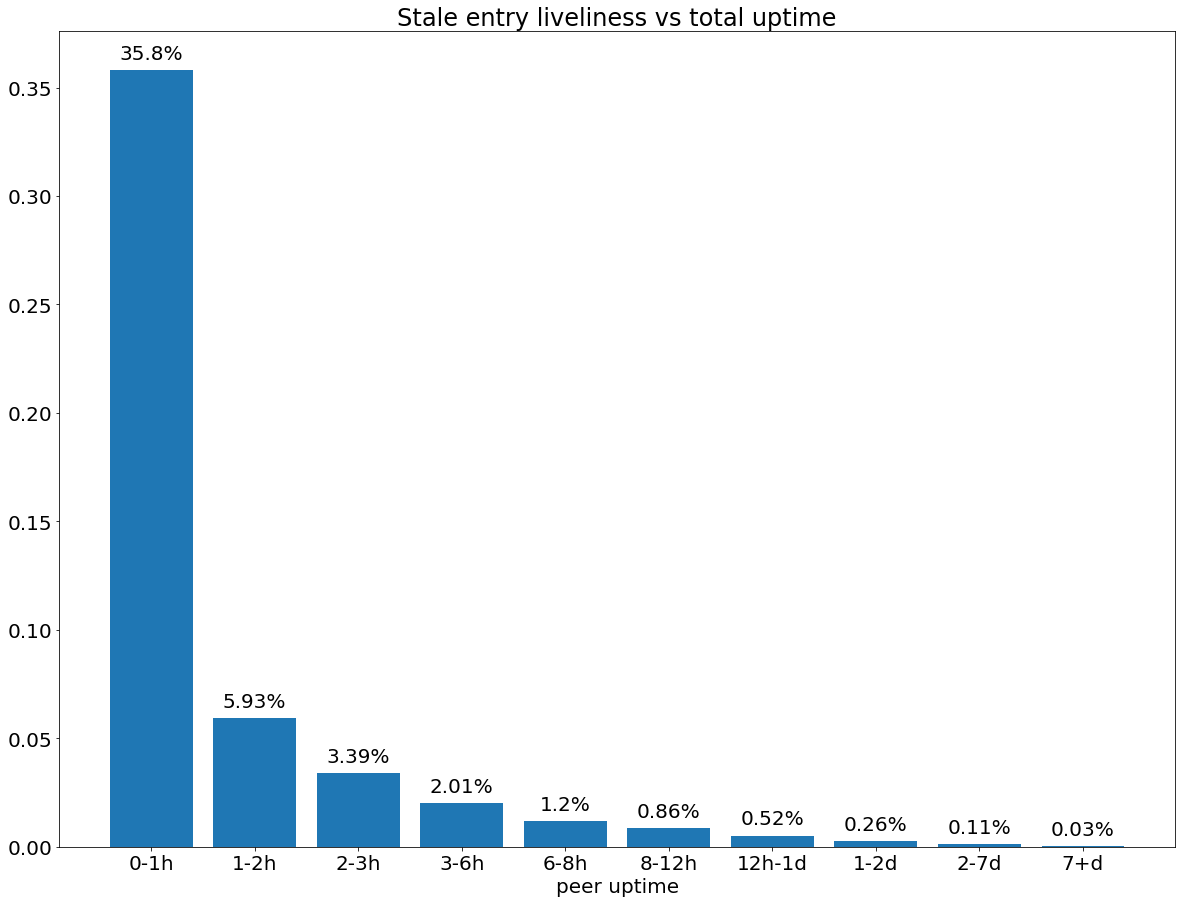

In [274]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.bar(range(0,len(limits)), stale_average)
ax.set_xticks(range(0,len(limits)))
ax.set_xticklabels(['0-1h', '1-2h', '2-3h', '3-6h', '6-8h', '8-12h', '12h-1d', '1-2d', '2-7d', '7+d'])

for i in range(len(limits)):
    plt.text(i, stale_average[i]+0.005, str(round(100*stale_average[i],2))+'%', ha='center')
    
plt.title('Stale entry liveliness vs total uptime')
plt.xlabel('peer uptime')

plt.show()

In [275]:
hours1 = [h-1 for h in hours if h>1]
hours2 = [h-2 for h in hours if h>2]
hours3 = [h-3 for h in hours if h>3]

In [294]:
start = 0
end = 3
datas = [[] for _ in range(start, end+1)]
for j in range(start,end+1):
    stale_ratio = [[] for _ in limits]
    hours1 = [h-j for h in hours if h>j]
    for h in hours1:
        for i in range(len(limits)):
            if i==len(limits)-1:
                if h>limits[i]:
                    stale_ratio[i].append(1/(12*(1/12+h)))
            elif h>limits[i] and h<limits[i+1]:
                stale_ratio[i].append(1/(12*(1/12+h)))

    datas[j-start] = [sum(stale_ratio[i])/len(stale_ratio[i]) for i in range(len(limits))]

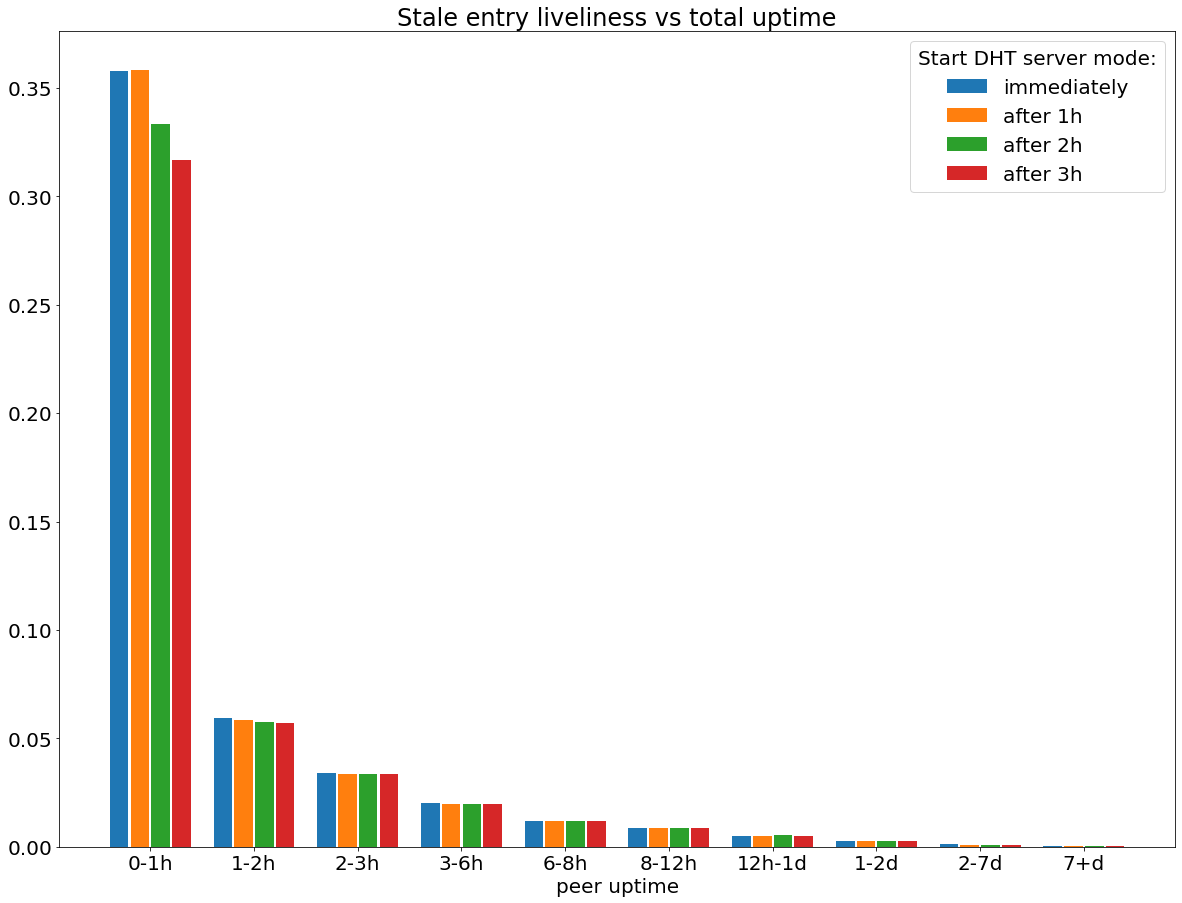

In [298]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.bar([x-0.30 for x in range(0,len(limits))], datas[0], width=0.18, label='immediately')
plt.bar([x-0.10 for x in range(0,len(limits))], datas[1], width=0.18, label='after 1h')
plt.bar([x+0.10 for x in range(0,len(limits))], datas[2], width=0.18, label='after 2h')
plt.bar([x+0.30 for x in range(0,len(limits))], datas[3], width=0.18, label='after 3h')
ax.set_xticks(range(0,len(limits)))
ax.set_xticklabels(['0-1h', '1-2h', '2-3h', '3-6h', '6-8h', '8-12h', '12h-1d', '1-2d', '2-7d', '7+d'])

#for i in range(len(limits)):
#    plt.text(i, datas[2][i]+0.005, str(round(100*datas[2][i],2))+'%', ha='center')
    
plt.title('Stale entry liveliness vs total uptime')
plt.xlabel('peer uptime')
plt.legend(title='Start DHT server mode:')

plt.show()

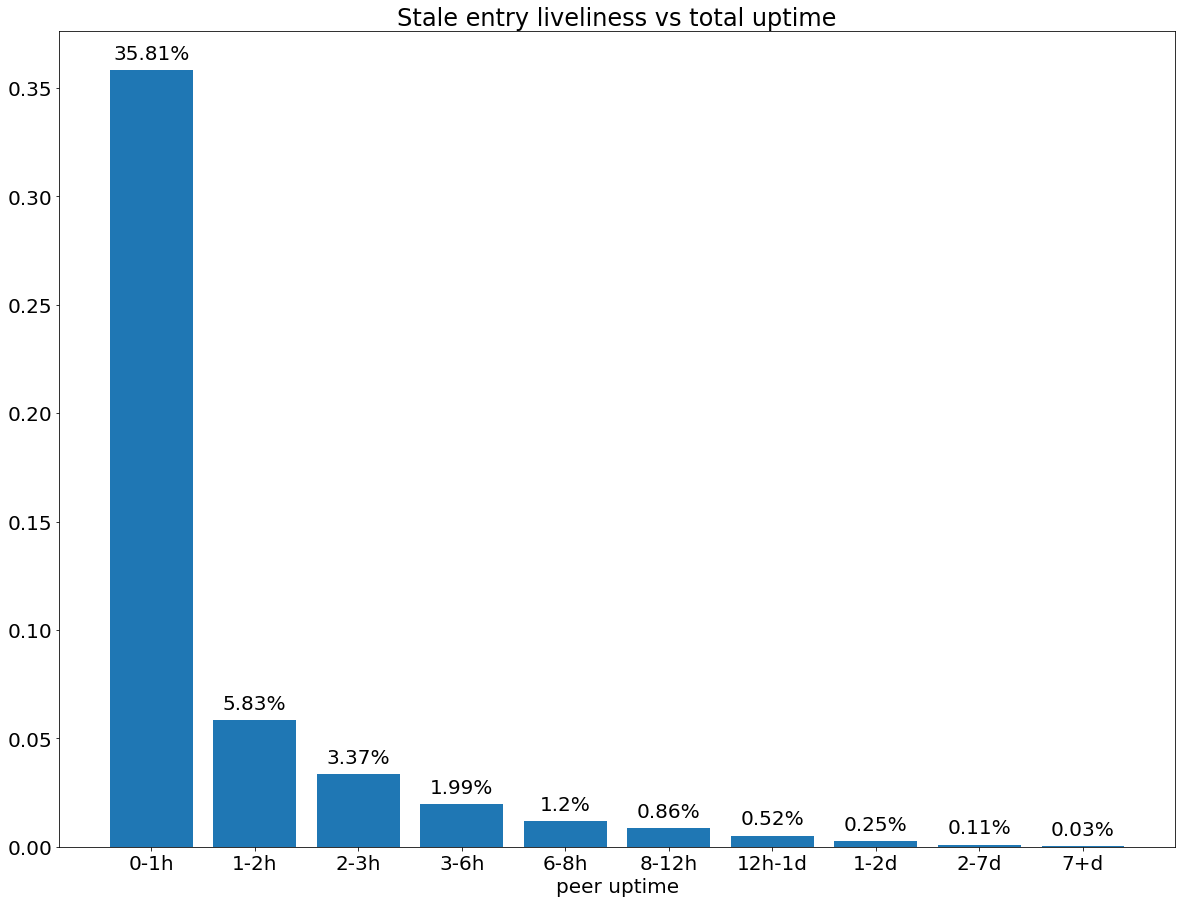

In [282]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.bar(range(0,len(limits)), datas[0])
ax.set_xticks(range(0,len(limits)))
ax.set_xticklabels(['0-1h', '1-2h', '2-3h', '3-6h', '6-8h', '8-12h', '12h-1d', '1-2d', '2-7d', '7+d'])

for i in range(len(limits)):
    plt.text(i, datas[0][i]+0.005, str(round(100*datas[0][i],2))+'%', ha='center')
    
plt.title('Stale entry liveliness vs total uptime')
plt.xlabel('peer uptime')

plt.show()

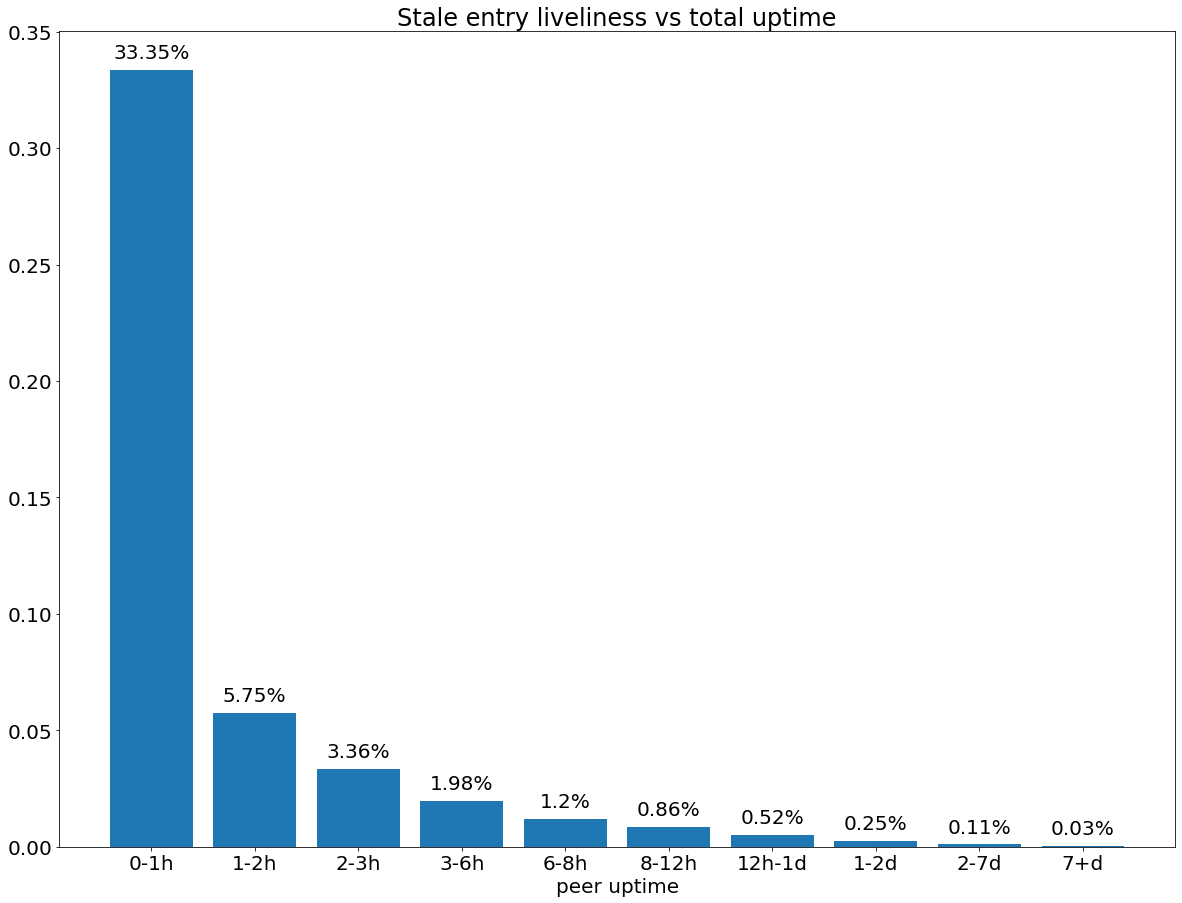

In [284]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.bar(range(0,len(limits)), datas[1])
ax.set_xticks(range(0,len(limits)))
ax.set_xticklabels(['0-1h', '1-2h', '2-3h', '3-6h', '6-8h', '8-12h', '12h-1d', '1-2d', '2-7d', '7+d'])

for i in range(len(limits)):
    plt.text(i, datas[1][i]+0.005, str(round(100*datas[1][i],2))+'%', ha='center')
    
plt.title('Stale entry liveliness vs total uptime')
plt.xlabel('peer uptime')

plt.show()

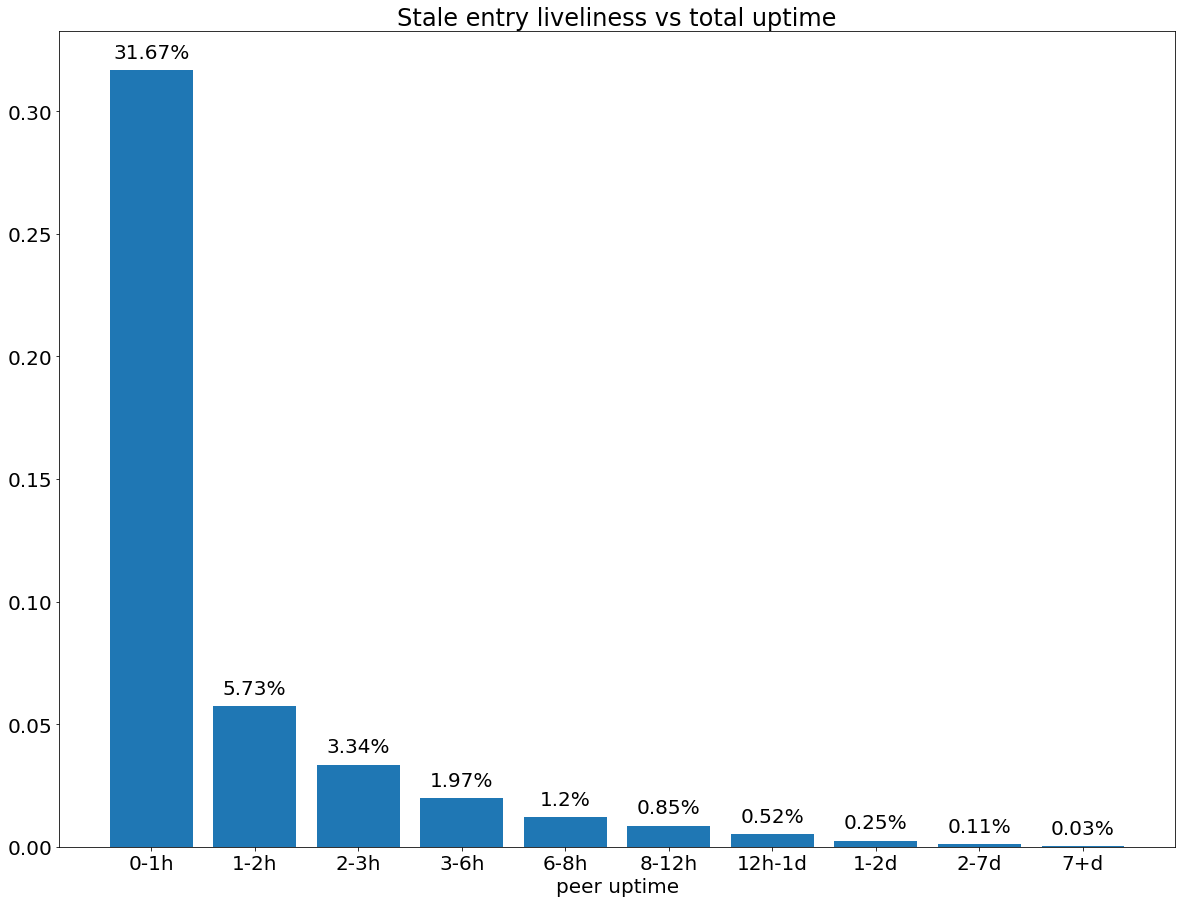

In [283]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.bar(range(0,len(limits)), datas[2])
ax.set_xticks(range(0,len(limits)))
ax.set_xticklabels(['0-1h', '1-2h', '2-3h', '3-6h', '6-8h', '8-12h', '12h-1d', '1-2d', '2-7d', '7+d'])

for i in range(len(limits)):
    plt.text(i, datas[2][i]+0.005, str(round(100*datas[2][i],2))+'%', ha='center')
    
plt.title('Stale entry liveliness vs total uptime')
plt.xlabel('peer uptime')

plt.show()

In [185]:
data = []
for i in range(5*24*2): # 5 days
    data.append(timerange.count(i))

(0.0, 200000.0)

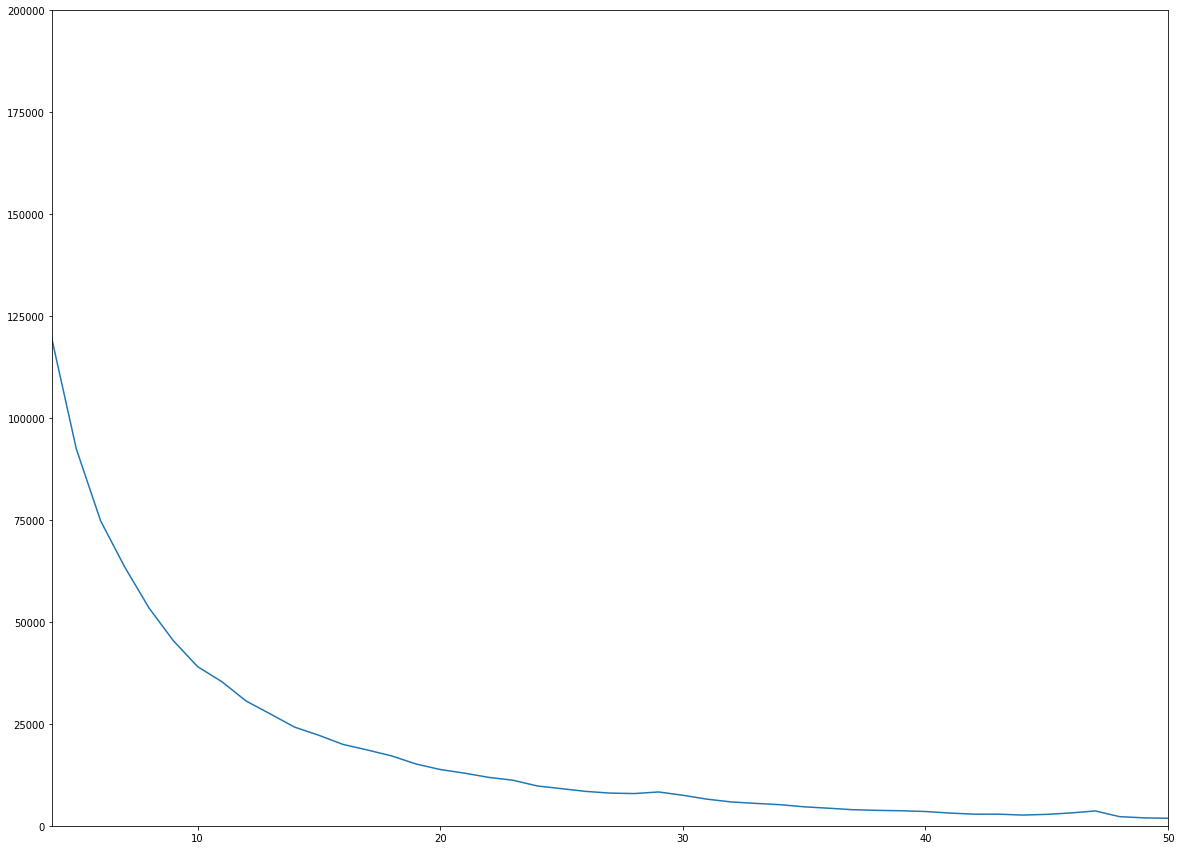

In [63]:
fig = plt.figure(figsize=(20,15), facecolor='white')

plt.plot(data)
plt.xlim(4, 50)
plt.ylim(0, 200000)

## Probability that a node will stay online 24 hours given that it has been online X hours

In [208]:
end = 24*2 # 24 hours
start = 0*2 # 30 min

In [209]:
still_online_after = [0] * (end-start+1)
still_online_after[end-start] = sum(data[end:])
for i in range(end-1, start-1, -1):
    still_online_after[i-start]=still_online_after[i-start+1]+data[i]

In [210]:
conditional = [still_online_after[end-start]/e for e in still_online_after]

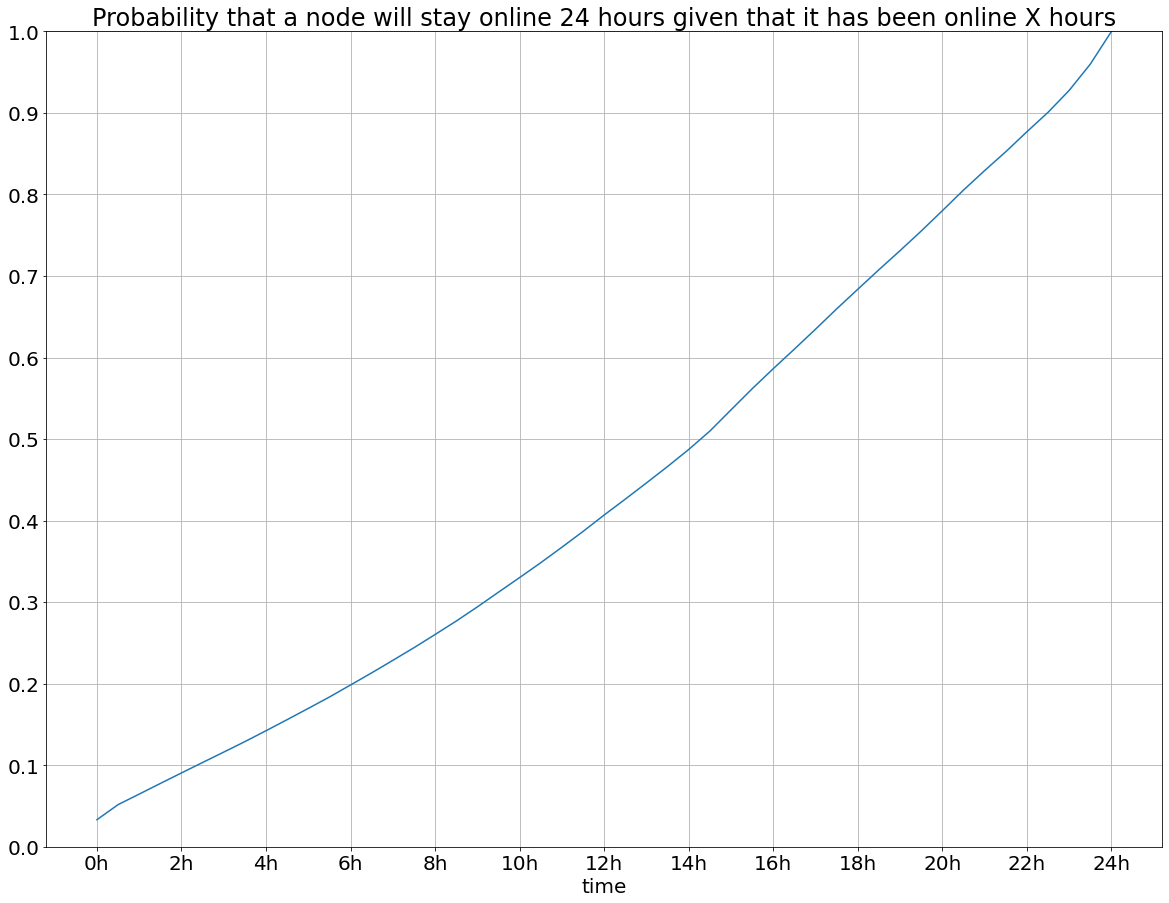

In [214]:
plt.rc('font', size=20)

fig = plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(1,1,1)

plt.ylim(0,1)
ax.set_yticks([x/10 for x in range(0, 11)])
plt.grid(axis='both')
ax.set_xticks(range(start, end+1, 4))
ax.set_xticklabels([str(x)+'h' for x in range(start//2, 1+(end+1)//2, 2)])
plt.plot(range(start,end+1), conditional)

plt.title('Probability that a node will stay online 24 hours given that it has been online X hours')
plt.xlabel('time')

plt.show()